## Results of point pollution dilbit spill scenarios at Turn Point
Plotting functions for comparing survival and recovery of groups of species within a single model scenario from the Salish Sea Atlantis Model

In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Define scenario and control files

In [3]:
# Read in salish sea atlantis output files.
scenario_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/')

control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/control_v6666mod/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)
time = np.ma.filled(control.variables['t'], np.nan)


In [15]:
# time after burn-in
start = 20
end = time.size-1

In [5]:
#regions by Atlantis boxes
JdF_west = [1,2,3,4]
JdF_east = [5,6,7,8,9,10,11]
Haro_Boundary = [60,33,34,35,36]
SoG_south = [54,64,68,79]
SoG_center = [80,81,82,83,84,85]
SoG_north = [88,92.98,101,102]
PS_main = [20,21,23,26]

In [16]:
scens = sorted([p for p in scenario_path.glob('*Scenario_5b_2019-07-10*/outputSalishSea.nc')])

### Results

Resample for 2-year average values

In [ ]:
# res_control = control.resample(t='2Y').mean()
# time = np.ma.filled(res_control.variables['t'], np.nan)

# for path in scens:
#     original_scenario = xr.open_dataset(str(path), decode_cf=True)
#     scenarios = original_scenario.resample(t='2Y').mean()


#### Concentration of PAH in seawater

In [7]:
def plot_pah(scens, pah):
    fig, ax = plt.subplots(figsize = (14,3))
    names = []
    for path in scens:
        scenario = xr.open_dataset(str(path), decode_cf=True)
        #scenario = original_scenario.resample(t='2Y').mean()
            
        nm = str(path).split(sep = '/')
        names.append(nm[7])

        contam = np.ma.filled(scenario.variables[str(pah)][start:end,:,:], np.nan)
        contam = contam.sum(axis=2)
        contam = contam.sum(axis=1)
        ax.plot(time[start:end], contam) 

    ax.set_title('Concentration of '+ pah +' in water column', fontsize = 12)
    ax.set_ylabel('mg PAH m$^{-3}$')
    ax.legend(names, loc='best');

Half lives

| PAH Concentration	|	Naphthalene |	Phenanthrene | Pyrene |	Benzo(a)pyrene |
|-------------------|---------------|-----------------|--------|----------|
| Half life (secs)	|	259200 |	3628800	| 20476800	| 19353600 |
| Half life (days)	|	3	| 42 |	237 |	224 |

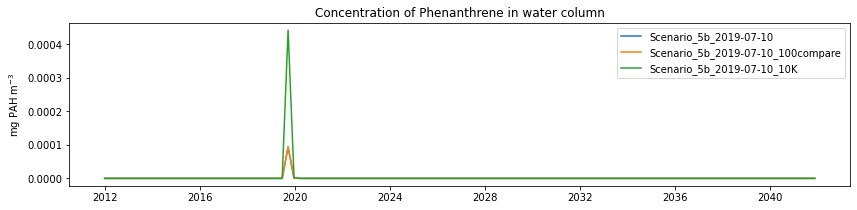

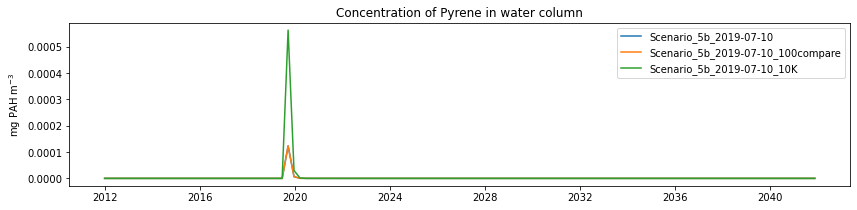

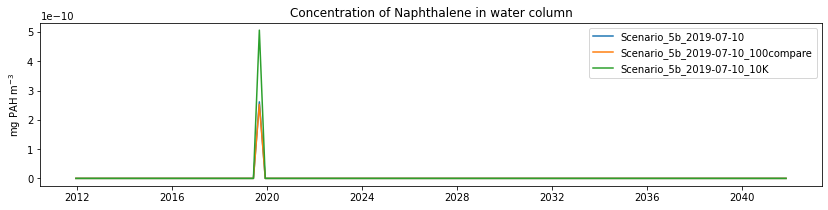

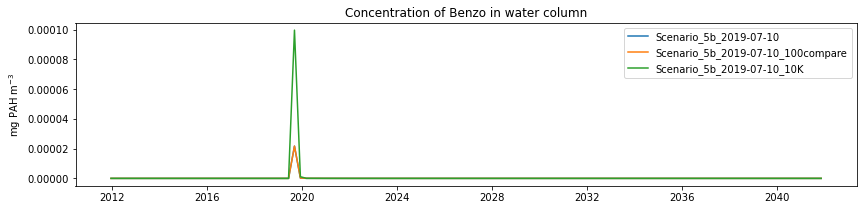

In [17]:
for pah in groups.pahs:
    plot_pah(scens,pah)

#### Concentration of PAH inside cell tissue

In [19]:
def tissue_concentration(group, pah, scens):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    names = []

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for path in scens:

            nm = str(path).split(sep = '/')
            names.append(nm[7])

            # if "-01-" in nm[7]:
            #     line_colour = '#1f77b4'
            # elif "-04-" in nm[7]:
            #     line_colour = '#2ca02c'
            # elif "-07-" in nm[7]:
            #     line_colour = '#fd8d3d'
            # else:
            #     line_colour = '#8b564c'

            # if "2019-" in nm[7]:
            #     line_type = '--'
            # else: 
            #     line_type = 'solid'

            scenario = xr.open_dataset(str(path), decode_cf=True)  
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_' + pah][start:end,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ax.plot(time[start:end], pelagic_oiled, linewidth = 2) #semilogy color = line_colour, linestyle = line_type, 
        
        plt.ylabel('mg PAH', fontsize=12)
        ax.set_title(species)
    ax.legend(names, bbox_to_anchor=(1.05, 1), fontsize=12);
    fig.suptitle(str(pah))

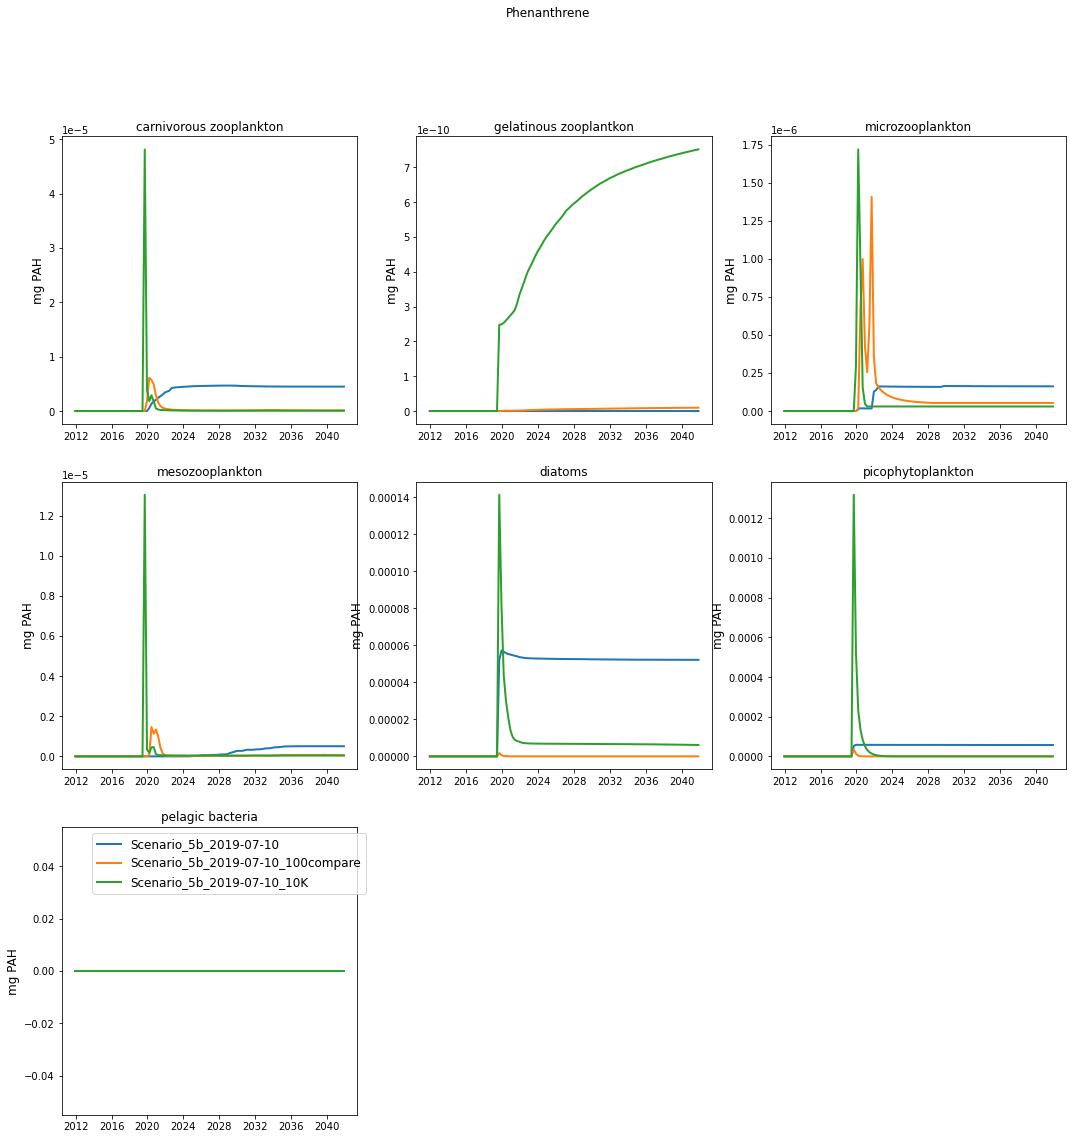

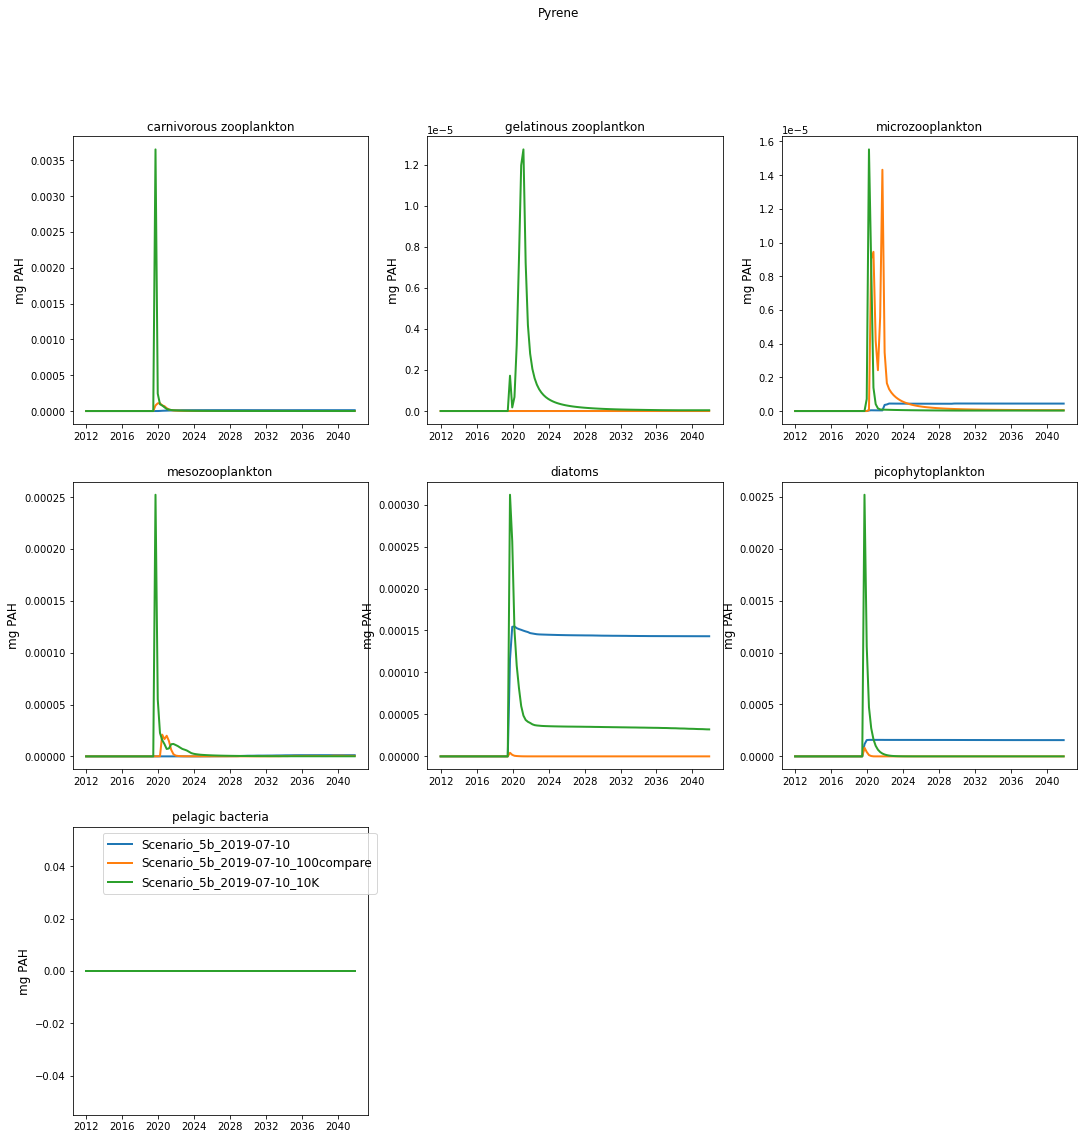

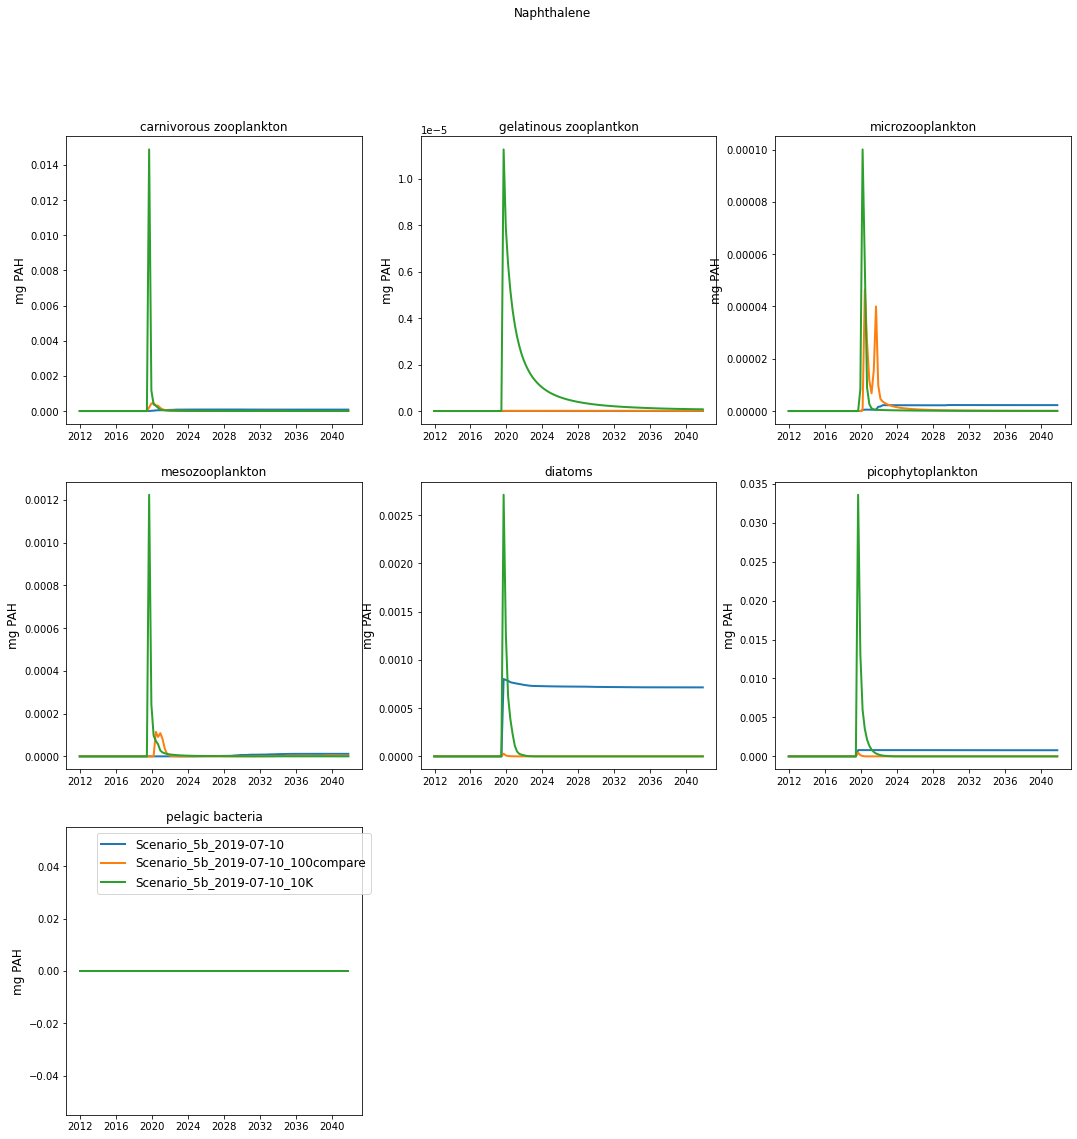

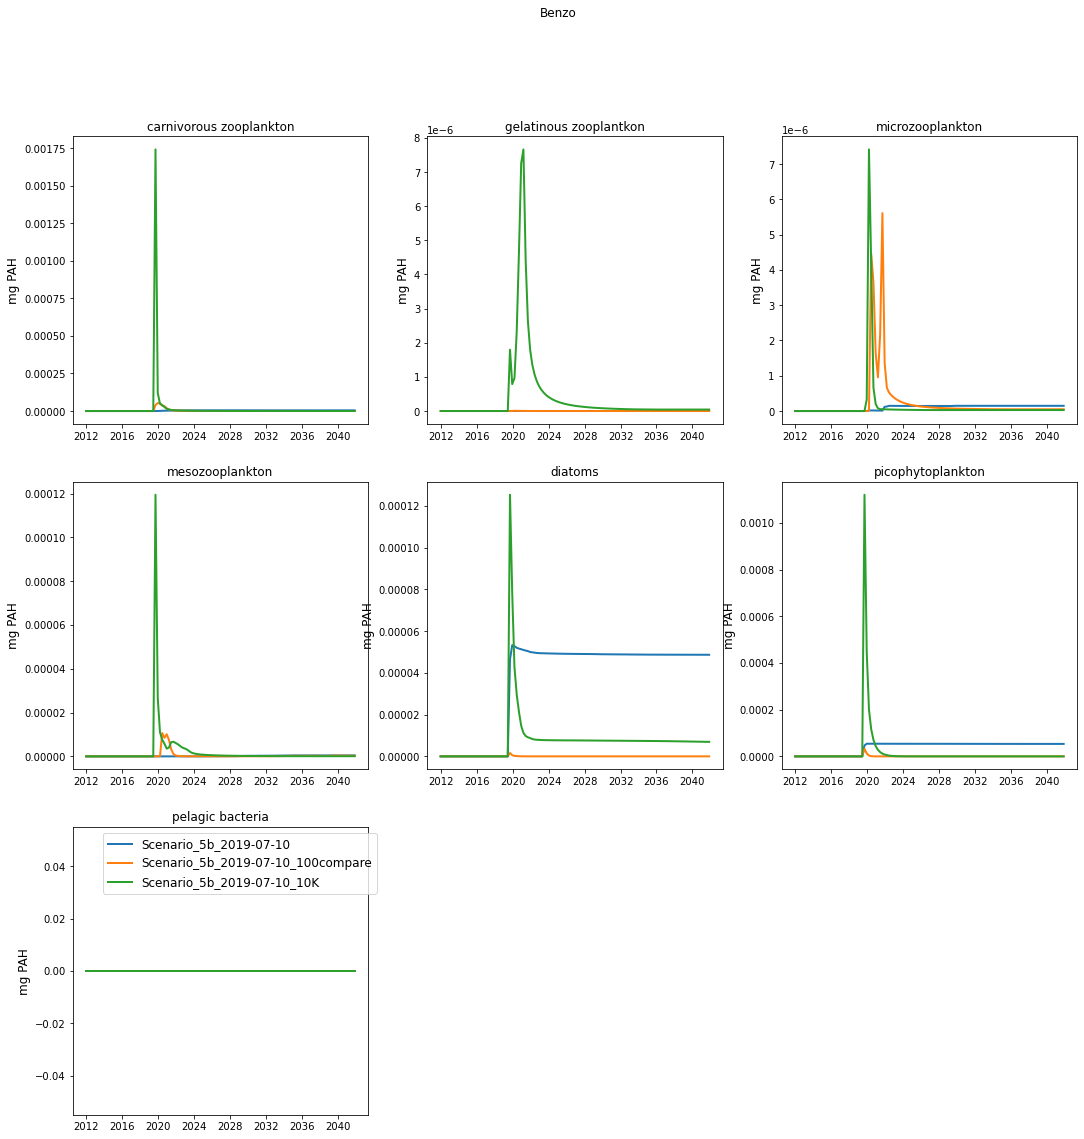

In [20]:
for pah in groups.pahs:
    tissue_concentration(groups.plankton,pah,scens)

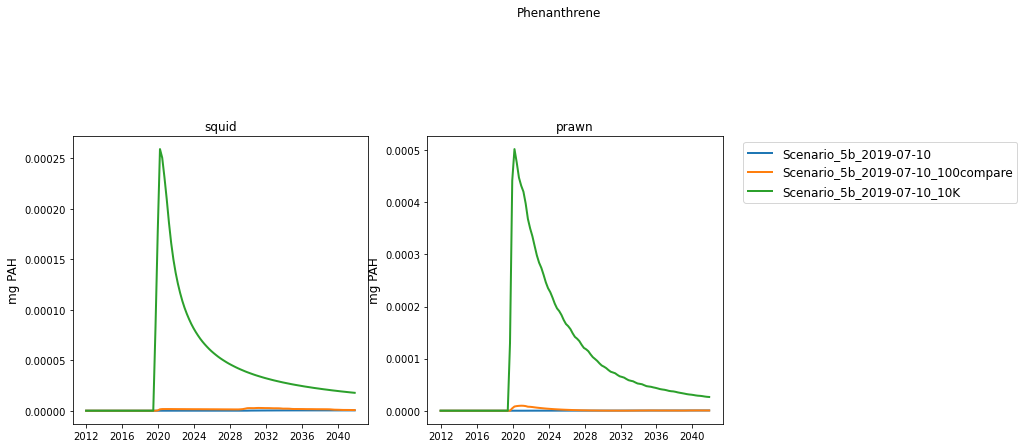

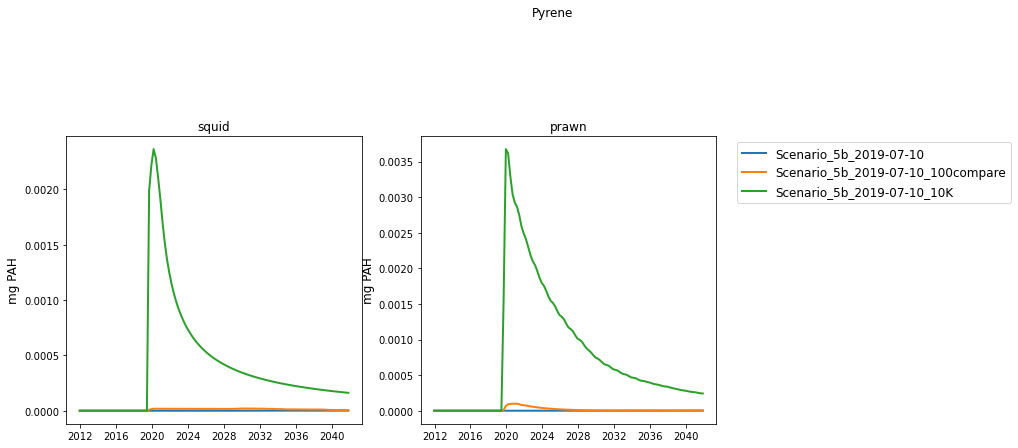

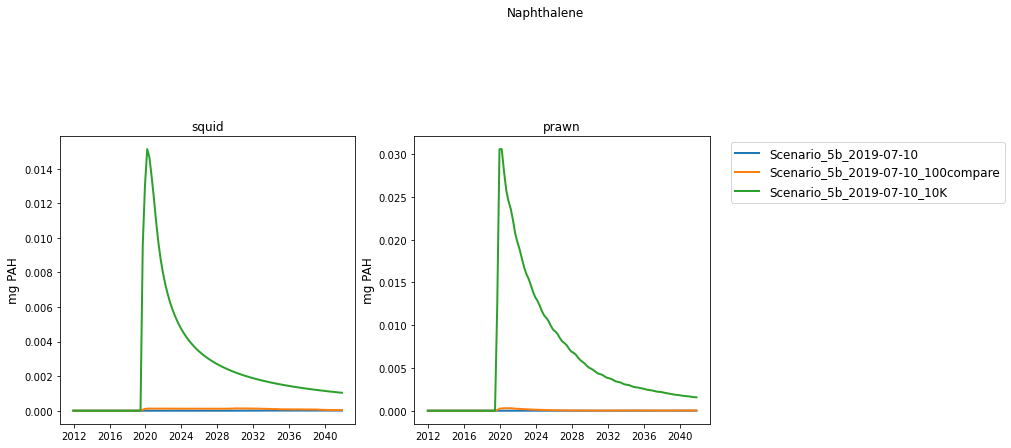

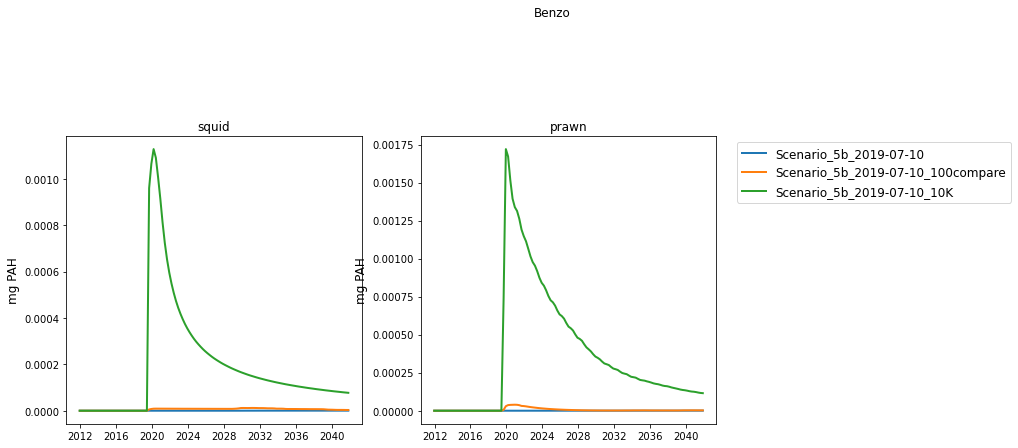

In [21]:
for pah in groups.pahs:
    tissue_concentration(groups.pelagic_invertebrates,pah,scens)

In [ ]:
group = groups.phytoplankton
fig = plt.figure(figsize=(18, 18), facecolor='white')
gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

names = []

for species in group:
    
    bio_index = (list(group).index(species))

    if bio_index < 3:
        position = 0, bio_index
    elif bio_index > 5: 
        position = 2, bio_index-6
    else :
        position = 1, bio_index-3

    ax = fig.add_subplot(gs[position])

    for path in scens:

        nm = str(path).split(sep = '/')
        names.append(nm[7])

        if "-01-" in nm[7]:
            line_colour = '#1f77b4'
        elif "-04-" in nm[7]:
            line_colour = '#2ca02c'
        elif "-07-" in nm[7]:
            line_colour = '#fd8d3d'
        else:
            line_colour = '#8b564c'

        if "2019-" in nm[7]:
            line_type = '--'
        else: 
            line_type = 'solid'

        scenario = xr.open_dataset(str(path), decode_cf=True)  
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_Prop_Pyrene'][start:end,:,0:6], np.nan) # tonnes
        pelagic_oiled = pelagic_oiled.sum(axis=2) 
        pelagic_oiled = pelagic_oiled.sum(axis=1) 
        ax.plot(time[start:end], pelagic_oiled, color = line_colour, linestyle = line_type, linewidth = 2) #semilogy
    
    plt.ylabel('propPyrene', fontsize=12)
    ax.legend(names)
    ax.set_title(species);

In [ ]:
group = groups.phytoplankton
fig = plt.figure(figsize=(18, 18), facecolor='white')
gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

names = []

for species in group:
    
    bio_index = (list(group).index(species))

    if bio_index < 3:
        position = 0, bio_index
    elif bio_index > 5: 
        position = 2, bio_index-6
    else :
        position = 1, bio_index-3

    ax = fig.add_subplot(gs[position])

    for path in scens:

        nm = str(path).split(sep = '/')
        names.append(nm[7])

        scenario = xr.open_dataset(str(path), decode_cf=True)  
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,0:6], np.nan) # tonnes
        pelagic_oiled = pelagic_oiled.sum(axis=2) 
        pelagic_oiled = pelagic_oiled.sum(axis=1) 
        ax.plot(time[start:end], pelagic_oiled, linewidth = 2) #semilogy
    
    plt.ylabel('mg N', fontsize=12)
    ax.legend(names)
    ax.set_title(species);

In [24]:
def tissue_vertebrate_concentration(group, pah, scens):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    names = []

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for path in scens:

            nm = str(path).split(sep = '/')
            names.append(nm[7])

            # if "-01-" in nm[7]:
            #     line_colour = '#1f77b4'
            # elif "-04-" in nm[7]:
            #     line_colour = '#2ca02c'
            # elif "-07-" in nm[7]:
            #     line_colour = '#fd8d3d'
            # else:
            #     line_colour = '#8b564c'

            # if "2019-" in nm[7]:
            #     line_type = '--'
            # else: 
            #     line_type = 'solid'

            scenario = xr.open_dataset(str(path), decode_cf=True)
            # scenario = original_scenario.resample(t='2Y').mean()
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '1_' + pah][start:end,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ax.plot(time[start:end], pelagic_oiled, linewidth = 2) #semilogy color = line_colour, linestyle = line_type, 
        
        plt.ylabel('mg PAH', fontsize=12)
        ax.legend(names)
        ax.set_title(species);

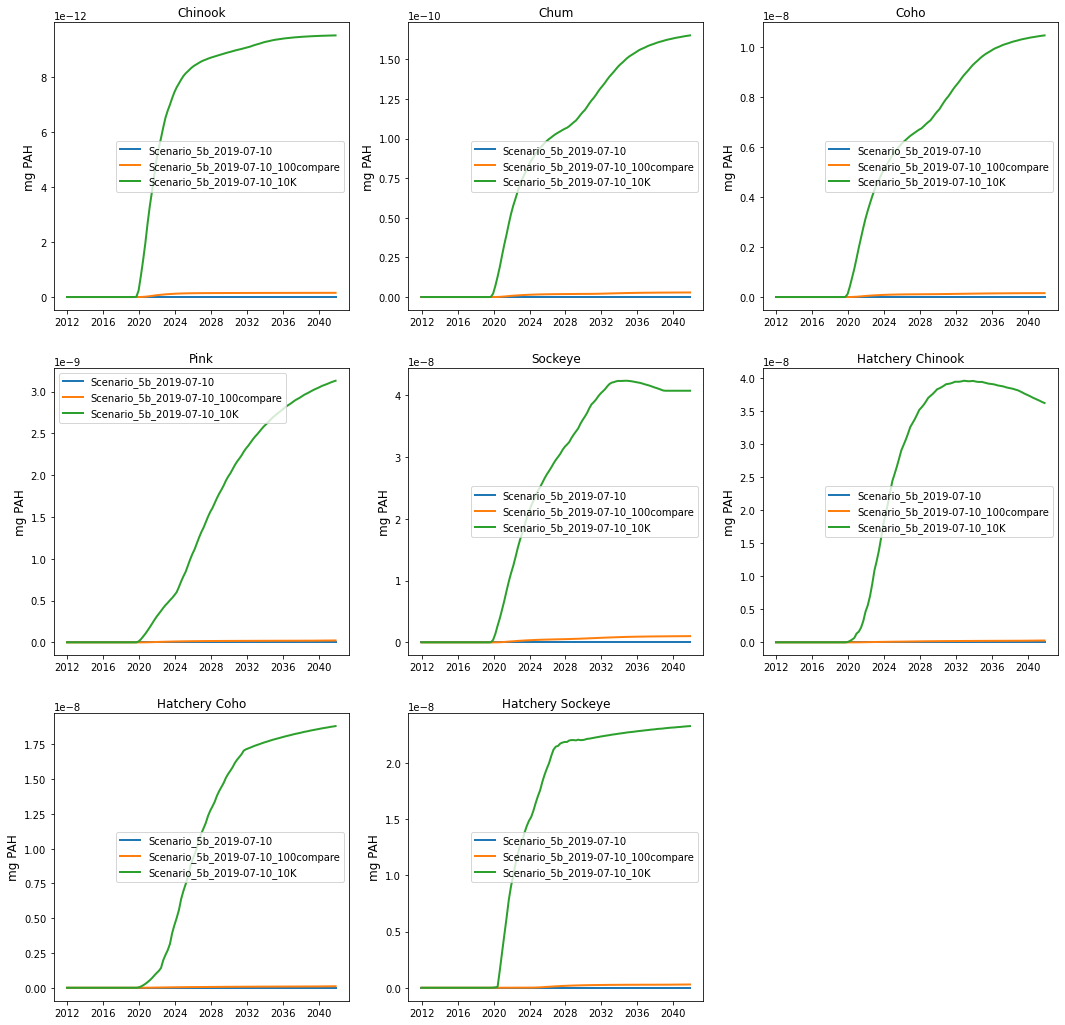

In [25]:
tissue_vertebrate_concentration(groups.salmon,'Pyrene',scens)

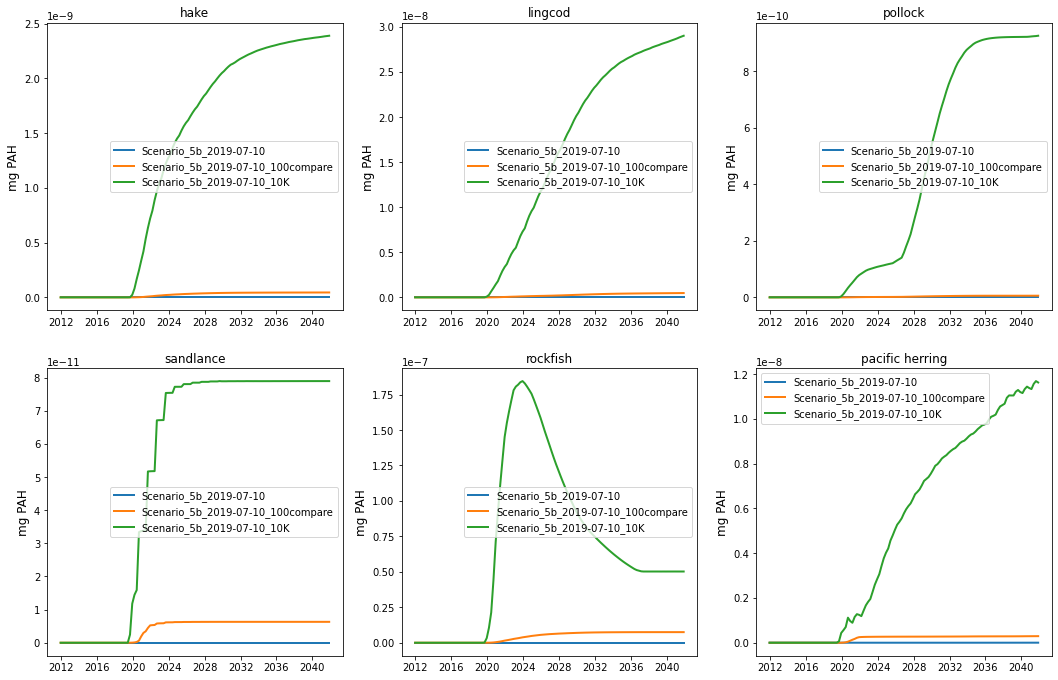

In [26]:
tissue_vertebrate_concentration(groups.named_fish,'Pyrene',scens)

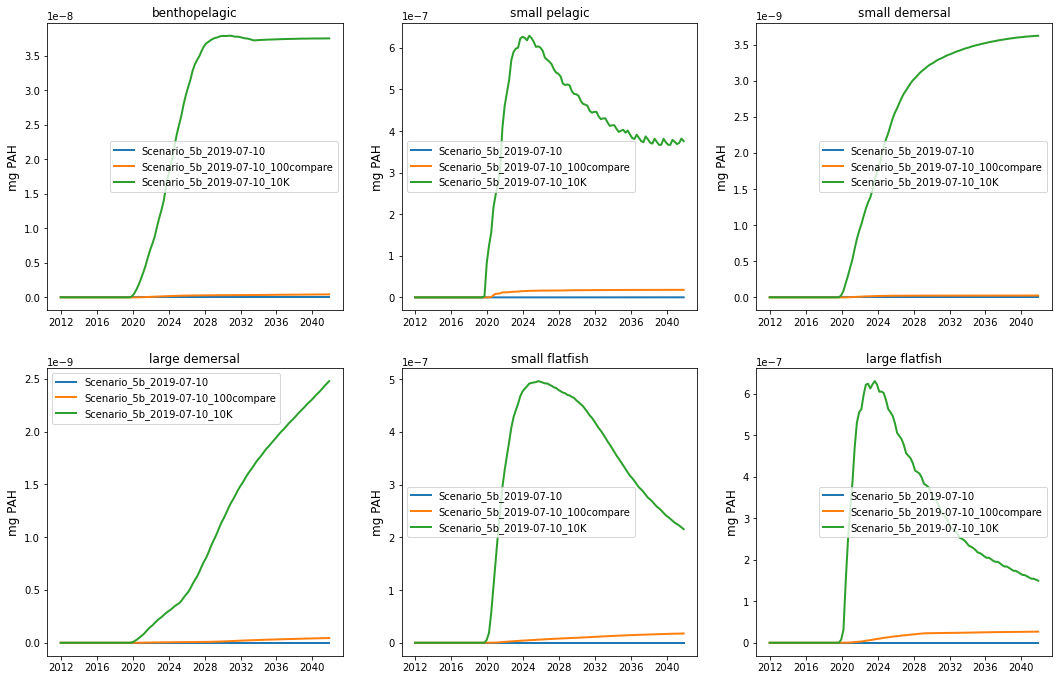

In [27]:
tissue_vertebrate_concentration(groups.other_fish,'Pyrene',scens)

In [28]:
def tissue_vert_adult_concentration(group, pah, scens):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    names = []

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for path in scens:

            nm = str(path).split(sep = '/')
            names.append(nm[7])

            # if "-01-" in nm[7]:
            #     line_colour = '#1f77b4'
            # elif "-04-" in nm[7]:
            #     line_colour = '#2ca02c'
            # elif "-07-" in nm[7]:
            #     line_colour = '#fd8d3d'
            # else:
            #     line_colour = '#8b564c'

            # if "2019-" in nm[7]:
            #     line_type = '--'
            # else: 
            #     line_type = 'solid'

            scenario = xr.open_dataset(str(path), decode_cf=True)
            # scenario = original_scenario.resample(t='2Y').mean()
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '5_' + pah][start:end,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ax.plot(time[start:end], pelagic_oiled, linewidth = 2) #semilogy color = line_colour, linestyle = line_type, 
        
        plt.ylabel('mg PAH', fontsize=12)
        ax.legend(names)
        ax.set_title(species);

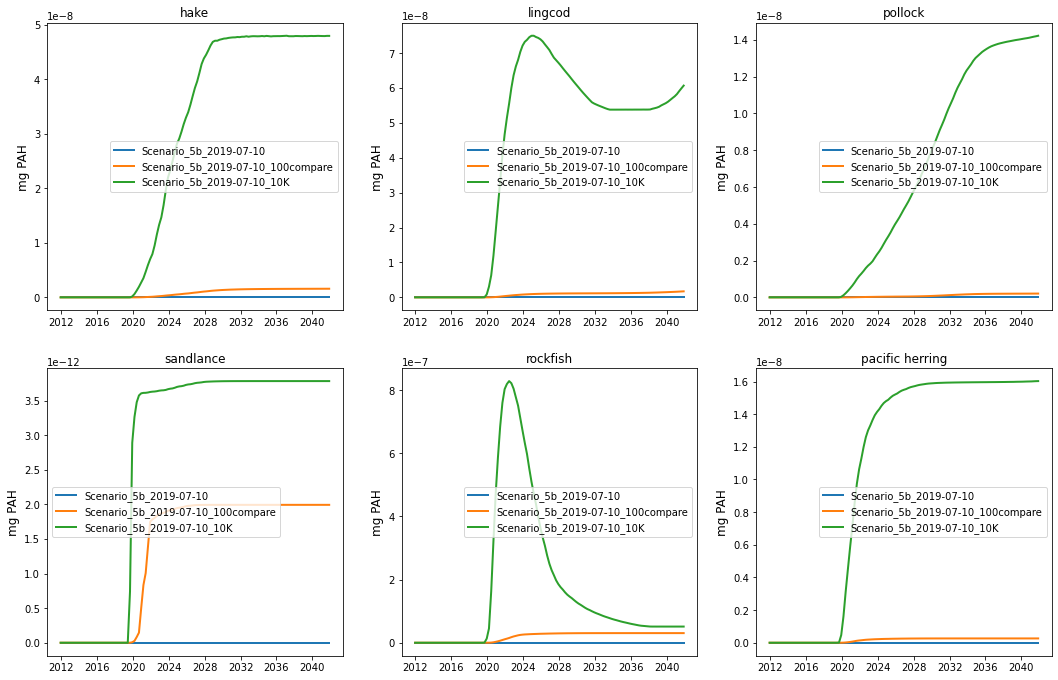

In [29]:
tissue_vert_adult_concentration(groups.named_fish,'Pyrene',scens)

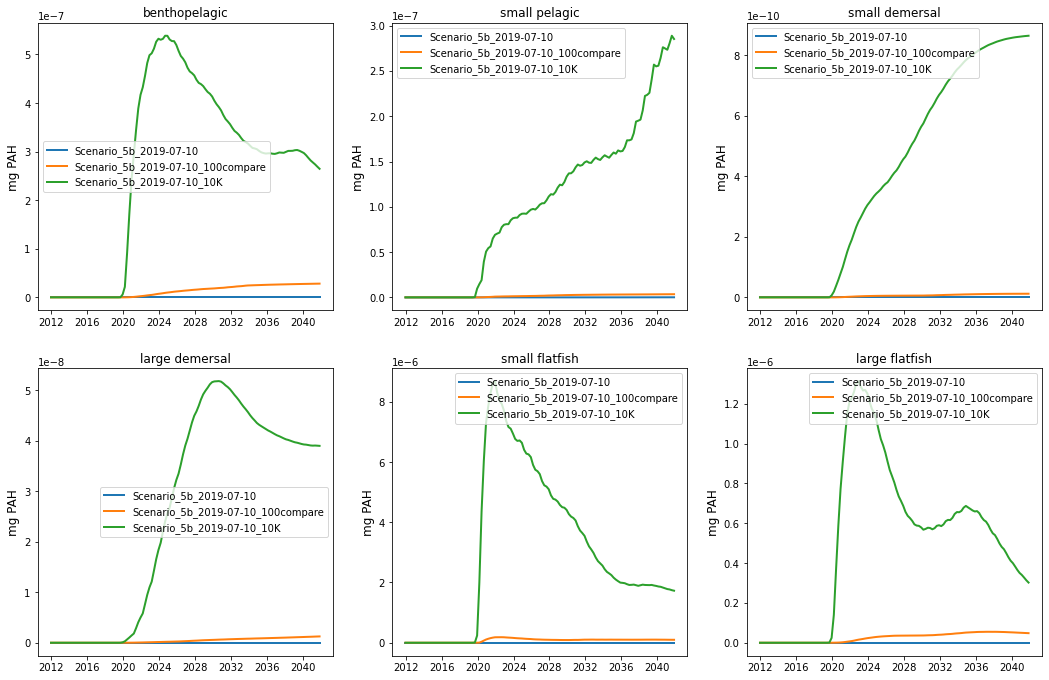

In [30]:
tissue_vert_adult_concentration(groups.other_fish,'Pyrene',scens)

KeyError: 'Hatchery_Chinook_salmon5_Pyrene'

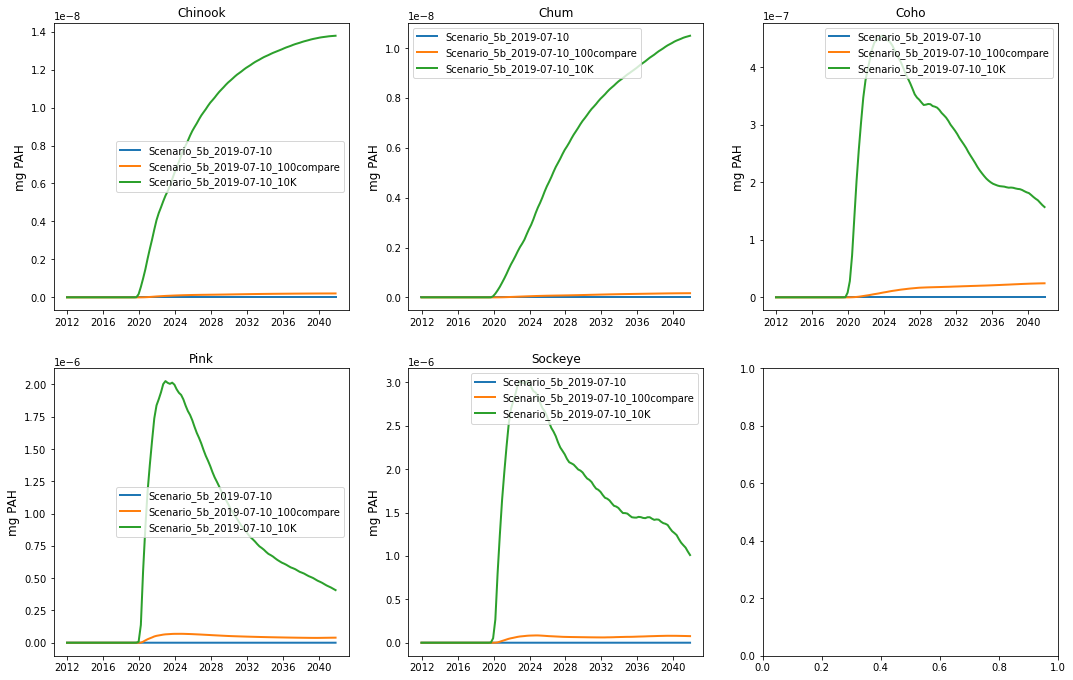

In [31]:
tissue_vert_adult_concentration(groups.salmon,'Pyrene',scens)

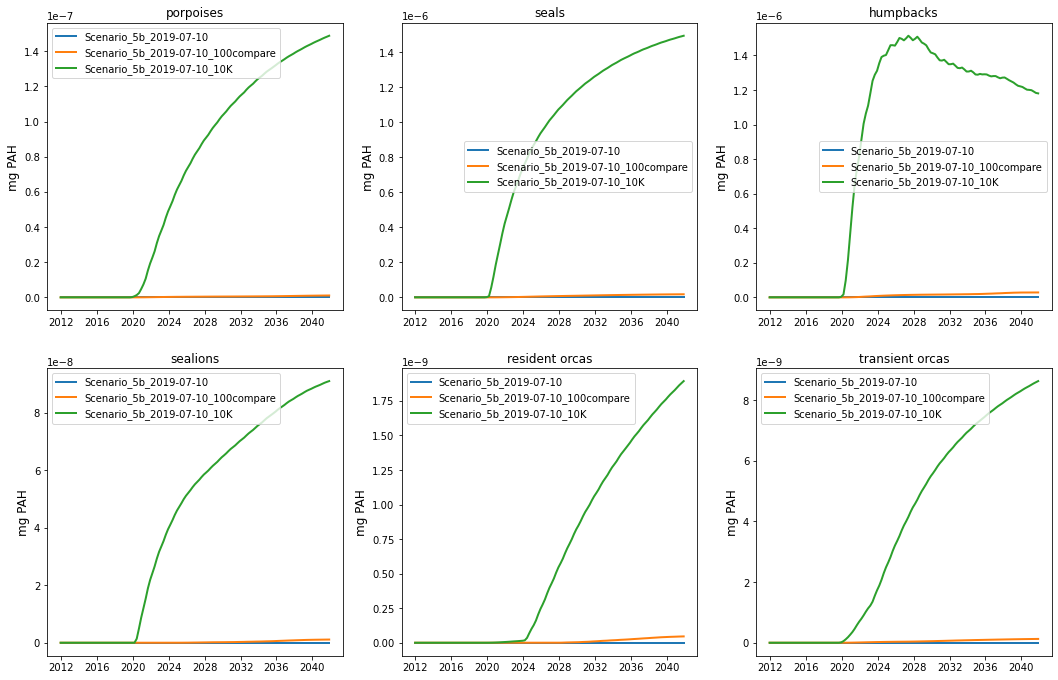

In [32]:
tissue_vert_adult_concentration(groups.mammals,'Pyrene',scens)

checking for seasonal differences in internal uptake of contaminants

In [ ]:
scens = sorted([p for p in scenario_path.glob('*Scenario_5b_*/outputSalishSea.nc')])
tissue_vertebrate_concentration(groups.salmon,'Pyrene',scens)

#### Change in biomass relative to a control

In [ ]:
def pelagic_compare_scenarios(group, scens, y_min=None, y_max=None): #bacteria, plankton, sharks, birds, mammals, named_fish, salmon, fish, benth_feeders

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        names = ['control']

        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,Haro_Boundary,0:6], np.nan)
        pelagic_control = pelagic_control.sum(axis=2)
        pelagic_control = pelagic_control.sum(axis=1)
        control_ratio = (pelagic_control / pelagic_control-1)*100
        ax.plot(time[start:end], control_ratio, 'k', linewidth = 2)

        for path in scens:

            nm = str(path).split(sep = '/')
            names.append(nm[7])

            # if "-01-" in nm[7]:
            #     line_colour = '#1f77b4'
            # elif "-04-" in nm[7]:
            #     line_colour = '#2ca02c'
            # elif "-07-" in nm[7]:
            #     line_colour = '#fd8d3d'
            # else:
            #     line_colour = '#8b564c'

            # if "2019-" in nm[7]:
            #     line_type = '--'
            # else: 
            #     line_type = 'solid'

            scenario = xr.open_dataset(str(path), decode_cf=True) 
            #scenario = original_scenario.resample(t='2Y').mean()
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,Haro_Boundary,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ratio = (pelagic_oiled / pelagic_control-1)*100
            ax.plot(time[start:end], ratio, linewidth = 2) #semilogy color = line_colour, linestyle = line_type, 

        plt.ylabel('Percent (%) change', fontsize=12)
        ax.set_title(species)
        ax.set_ylim([y_min, y_max])
    fig.legend(names, bbox_to_anchor=(1.05, 1), fontsize=12); #loc='upper left', 

In [ ]:
pelagic_compare_scenarios(groups.phytoplankton, scens)

In [ ]:
pelagic_compare_scenarios(groups.phytoplankton, scens)

In [ ]:
pelagic_compare_scenarios(groups.planktonic, scens) # Haro Boundary

In [ ]:
pelagic_compare_scenarios(groups.planktonic, scens) # Haro Boundary

In [ ]:
def plot_pelagic_depth(group, scens):

    fig = plt.figure(figsize=(18, 27), facecolor='white')
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

    depth = [100, 50, 25, 0]

    for species in group:

        names = []

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 8: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,2:6], np.nan)
        p_control = pelagic_control.sum(axis=0)
        p_control = p_control.sum(axis=0)
    
        ax.set_ylim(100, 0)  # decreasing depth
        for path in scens:

            nm = str(path).split(sep = '/')
            names.append(nm[7])

            # if "-01-" in nm[7]:
            #     line_colour = '#1f77b4'
            # elif "-04-" in nm[7]:
            #     line_colour = '#2ca02c'
            # elif "-07-" in nm[7]:
            #     line_colour = '#fd8d3d'
            # else:
            #     line_colour = '#8b564c'

            # if "2019-" in nm[7]:
            #     line_type = '--'
            # else: 
            #     line_type = 'solid'

            scenario =  xr.open_dataset(str(path), decode_cf=True)
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,2:6], np.nan) # tonnes, take only water column layers
            p_oiled = pelagic_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            ax.plot(p_oiled, depth, linewidth = 2) #color=line_colour, linestyle=line_type,
        ax.plot(p_control, depth, '-.k', linewidth = 2)
        ax.set_title(species);
        ax.set_ylabel('depth, m')
        ax.set_xlabel('mg N$^{-3}$')
    names.append('control')
    ax.legend(names, bbox_to_anchor=(1.05, 1), fontsize=12); #loc='upper left', )

In [ ]:
plot_pelagic_depth(groups.phytoplankton, scens) # Haro_Boundary

In [ ]:
plot_pelagic_depth(groups.phytoplankton, scens)

In [ ]:
def boxplot_pelagic(group, scens, x_lim=None): #bacteria, plankton

    for path in scens:
        
        nm = str(path).split(sep = '/')
        #names.append(nm[7])
        df = pd.DataFrame({nm[7]: []})

        spp = []

        scenario = xr.open_dataset(str(path), decode_cf=True)
        
        for species in group:
            results = list()
        
            p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][:,:,0:6], np.nan) # tonnes, take only water column layers
            p_control = np.ma.filled(control.variables[group[species] + '_N'][:,:,0:6], np.nan)
            p_oiled = p_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            p_oiled = p_oiled.sum(axis=0)
            p_control = p_control.sum(axis=0)
            p_control = p_control.sum(axis=0)
            p_control = p_control.sum(axis=0)
            ratio = (p_oiled/p_control-1)*100
            results.append(ratio)
            spp.append(group[species])
            df.loc[len(df.index)] = results
        df['bio_group'] = spp
        df1 = df.set_index('bio_group')

        df1.plot(kind="barh", subplots=True, layout=(1,len(scens)), figsize=(15,4), sharey=True, sharex=True, legend=False, #ax=ax,
            xlabel='Pelagic Groups', ylabel='Percent (%) Change relative to control', xlim=x_lim); #title='Percent (%) Change Relative to Control for Select Pelagic Groups',

In [ ]:
boxplot_pelagic(groups.plankton, scens, x_lim=[-10,5])

In [ ]:
boxplot_pelagic(groups.salmon, scens, x_lim=[-2,2])

In [ ]:
def pelagic_compare_scenarios(group, scens, control=control, time=time, start=start, end=end, y_min=None, y_max=None): #bacteria, plankton, sharks, birds, mammals, named_fish, salmon, fish, benth_feeders

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    names = ['control']

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:6], np.nan)
        pelagic_control = pelagic_control.sum(axis=2)
        pelagic_control = pelagic_control.sum(axis=1)
        control_ratio = (pelagic_control / pelagic_control-1)*100
        ax.plot(time[start:end], control_ratio, 'k', linewidth = 2)
    
        for path in scens:
            nm = str(path).split(sep = '/')
            names.append(nm[7])
            scenario = xr.open_dataset(str(path), decode_cf=True)
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ratio = (pelagic_oiled / pelagic_control-1)*100
            ax.plot(time[start:end], ratio, linewidth = 2)
       
        plt.ylabel('Percent (%) change', fontsize=12)
        ax.set_title(species)
        ax.set_ylim([y_min, y_max])
    ax.legend(names, bbox_to_anchor=(1.05, 1), fontsize=12); #loc='upper left', )


In [ ]:
pelagic_compare_scenarios(groups.named_fish, scens, y_min=-10, y_max=None)

In [ ]:
pelagic_compare_scenarios(groups.other_fish, scens, y_min=-10, y_max=None)

In [ ]:
pelagic_compare_scenarios(groups.pelagic_invertebrates, scens, y_min=None, y_max=None)

In [ ]:
boxplot_pelagic(groups.pelagic_invertebrates, scens, x_lim=[-10,5])

In [ ]:
def benthic_compare_scenarios(group, scens, control=control, time=time, start=start, end=end, y_min=None, y_max=None): #bacteria, plankton, sharks, birds, mammals, named_fish, salmon, fish, benth_feeders

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    names = ['control']

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:], np.nan)
        pelagic_control = pelagic_control.sum(axis=1)
        control_ratio = (pelagic_control / pelagic_control-1)*100
        ax.plot(time[start:end], control_ratio, 'k', linewidth = 2)
    
        for path in scens:
            nm = str(path).split(sep = '/')
            names.append(nm[7])
            scenario = xr.open_dataset(str(path), decode_cf=True)
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ratio = (pelagic_oiled / pelagic_control-1)*100
            ax.plot(time[start:end], ratio, linewidth = 2)
       
        plt.ylabel('Percent (%) change', fontsize=12)
        ax.set_title(species)
        ax.set_ylim([y_min, y_max])
    ax.legend(names, bbox_to_anchor=(1.05, 1), fontsize=12); #loc='upper left', )

In [ ]:
sediment_compare_scenarios(groups.sediment_feeders, scenarios, control, time, start, end, y_min=-10, y_max=None)

In [ ]:
benthic_compare_scenarios(groups.benthos, scens, y_min=None, y_max=None)

### Map display

In [ ]:
def map_aggregate_time(variable_name, scens, v_max=None, v_min=None):

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]

    _cmap = cm.Purples
    
    # map of single variable ratio across the whole simulation

    # Pull variables for all scenarios
    fig = plt.figure(figsize=(29, 8), facecolor='white') #figsize=(9, 12)
    gs = plt.GridSpec(1, len(scens), wspace=0.5, hspace=0.2, height_ratios=[1],)

    position = 0

    for path in scens:
        nm = str(path).split(sep = '/')
        scenario = xr.open_dataset(str(path), decode_cf=True)
        dVar_s = scenario.variables[variable_name]
        dVar_s = dVar_s.mean(axis=2)
        pah = dVar_s.mean(axis=0)

        # Add scenario data to Atlantis spatial data
        map_df['pah'] = pah
        map_df.loc[land_boxes, 'pah'] = 0

        ax = fig.add_subplot(gs[0, position])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=-0.5) 
        ax = map_df.plot(column = 'pah', cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
            legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
            )
        ax.set_title(nm[7], fontsize = 12)
        map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
        land_df.plot(ax=ax, color='white');
        position = position+1

In [ ]:
map_aggregate_time('Pyrene', scens, v_max=None, v_min=None)

In [ ]:
map_aggregate_time('Squid_Pyrene', scens, v_max=None, v_min=None)

In [ ]:
map_aggregate_time('Diatom_Pyrene', scens, v_max=None, v_min=None)

In [ ]:
map_aggregate_time('PicoPhytopl_Pyrene', scens, v_max=None, v_min=None)

In [ ]:
map_aggregate_time('Zoo_Pyrene', scens, v_max=None, v_min=None)

In [ ]:
map_aggregate_time('Diatom_N', scens, v_max=None, v_min=None)

In [ ]:
map_aggregate_time('PicoPhytopl_N', scens)

In [ ]:
map_aggregate_time('MicroZoo_N', scens) #ZS

In [ ]:
def map_pelagic_aggregate_time(variable_name, scens, v_max=100, v_min=-100):

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]

    _cmap = cm.bwr_r # cm.ocean_r
    
    # map of single variable ratio across the whole simulation

    # Pull variables for all scenarios
    dVar_control = control.variables[variable_name]
    dVar_control = dVar_control.sum(axis=2)
    dVar_control = dVar_control.sum(axis=0)

    fig = plt.figure(figsize=(29, 8), facecolor='white') #figsize=(9, 12)
    gs = plt.GridSpec(1, len(scens), wspace=0.5, hspace=0.2, height_ratios=[1],)

    position = 0

    for path in scens:
        nm = str(path).split(sep = '/')
        scenario = xr.open_dataset(str(path), decode_cf=True)
        dVar_s = scenario.variables[variable_name]
        dVar_s = dVar_s.sum(axis=2)
        dVar_s = dVar_s.sum(axis=0)
        percent_oil = (dVar_s / dVar_control-1)*100 

        # Add scenario data to Atlantis spatial data
        map_df['percent'] = percent_oil
        map_df.loc[land_boxes, 'percent'] = 0

        ax = fig.add_subplot(gs[0, position])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=-0.5) 
        ax = map_df.plot(column = 'percent', cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
            legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
            )
        ax.set_title(nm[7], fontsize = 12)
        map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
        land_df.plot(ax=ax, color='white');
        position = position+1

    return

In [ ]:
map_pelagic_aggregate_time('Diatom_N', scens)

In [ ]:
map_pelagic_aggregate_time('PicoPhytopl_N', scens)

In [ ]:
map_pelagic_aggregate_time('Zoo_N', scens) #ZM

In [ ]:
map_pelagic_aggregate_time('Carniv_Zoo_N', scens) #ZL

In [ ]:
map_pelagic_aggregate_time('Squid_N', scens)

In [ ]:
map_pelagic_aggregate_time('Prawn_N', scens)

In [ ]:
map_pelagic_aggregate_time('Pink_salmon_N', scens, v_max=10, v_min=-10)

In [ ]:
map_pelagic_aggregate_time('Harbor_porpoise_N', scens, v_max=10, v_min=-10)

In [ ]:
map_pelagic_aggregate_time('Pacific_herring_N', scens, v_max=10, v_min=-10)

In [ ]:
map_pelagic_aggregate_time('Small_pelagic_fish_N', scens)

In [ ]:
map_pelagic_aggregate_time('Sockeye_salmon_N', scens, v_max=10, v_min=-10)

In [ ]:
map_pelagic_aggregate_time('Hatchery_Sockeye_salmon_N', scens, v_max=10, v_min=-10)

In [ ]:
map_pelagic_aggregate_time('Hake_N', scens, v_max=10, v_min=-10)

### oil dispersal

In [ ]:
# salish sea atlantis box shapefile.
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)
data_df = data_df.sort_values(by=['BOX_ID'])
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]

# Reading in the files generated by Ocean Parcels
scen_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/contaminant-dispersal/results/Ocean-Parcels-Final-Files/')
scens = sorted([p for p in scen_path.glob('5b_TurnPoint_Dilbit_*_OP_D50_wp3.nc')])

_cmap = cm.Paired
land_df = data_df.loc[land_boxes]

ax = data_df.plot(figsize=(9, 15), column = 'vertmix', cmap=_cmap, 
    vmin=0, vmax = 10,
    legend=False,
    )
land_df.plot(ax=ax, color='white')
oil_names = []

for path in scens:
    onm = str(path).split(sep = '_')
    oil_names.append(onm[3])

    pfile = xr.open_dataset(str(path), decode_cf=True)

    lon = np.ma.filled(pfile.variables['lon'], np.nan)
    lat = np.ma.filled(pfile.variables['lat'], np.nan)

    if "-01-" in onm[3]:
        point_colour = '#1f77b4'
    elif "-04-" in onm[3]:
        point_colour = '#2ca02c'
    elif "-07-" in onm[3]:
        point_colour = '#fd8d3d'
    else:
        point_colour = '#8b564c'

    ax.scatter(lon, lat, s=10, zorder=20, c=point_colour) #s=0.001
ax.set_title('5b_TurnPoint_Dilbit', fontsize = 12)
ax.legend(oil_names);

### box depth profiles

In [ ]:
# Reading in the files generated by Ocean Parcels
scen_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/')
scens = sorted([p for p in scen_path.glob('Scenario_5b_*/outputSalishSea.nc')])

control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/control_v6666mod/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)
time = np.ma.filled(control.variables['t'], np.nan)
start = 48
end = time.size-1

depth = [400, 250, 100, 50, 25, 0]
names = ['control']


In [ ]:
# Reading in the files generated by Ocean Parcels
group = groups.plankton
fig = plt.figure(figsize=(12, 27), facecolor='white')
gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

depth = [100, 50, 25, 0]

for species in group:

    bio_index = (list(group).index(species))

    if bio_index < 4:
        position = 0, bio_index
    elif bio_index > 8: 
        position = 2, bio_index-8
    else :
        position = 1, bio_index-4

    ax = fig.add_subplot(gs[position])
    pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,60,2:6], np.nan)
    p_control = pelagic_control.sum(axis=0)
    ax.plot(p_control, depth, '-k', linewidth = 3)
    ax.set_ylim(400, 0)  # decreasing depth
    for path in scens:

        nm = str(path).split(sep = '_')
        names.append(nm[3])

        if "-01-" in nm[3]:
            line_colour = '#1f77b4'
        elif "-04-" in nm[3]:
            line_colour = '#2ca02c'
        elif "-07-" in nm[3]:
            line_colour = '#fd8d3d'
        else:
            line_colour = '#8b564c'

        scenario =  xr.open_dataset(str(path), decode_cf=True)
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,60,0:6], np.nan) # tonnes, take only water column layers
        p_oiled = pelagic_oiled.sum(axis=0)
        ax.plot(p_oiled, depth, color=line_colour, linewidth = 2)
    ax.set_title(species);

In [ ]:
# Reading in the files generated by Ocean Parcels
boxes = [9,8,4,33,34]
group = groups.plankton

for box in boxes:
    fig = plt.figure(figsize=(12, 27), facecolor='white')
    gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 
    fig.suptitle('Atlantis Box # '+str(box))

    for species in group:

        bio_index = (list(group).index(species))

        if bio_index < 4:
            position = 0, bio_index
        elif bio_index > 8: 
            position = 2, bio_index-8
        else :
            position = 1, bio_index-4

        ax = fig.add_subplot(gs[position])
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box,0:6], np.nan)
        p_control = pelagic_control.sum(axis=0)
        ax.plot(p_control, depth, '-k', linewidth = 3)
        ax.set_ylim(400, 0)  # decreasing depth
        for path in scens:

            nm = str(path).split(sep = '_')
            names.append(nm[3])

            if "-01-" in nm[3]:
                line_colour = '#1f77b4'
            elif "-04-" in nm[3]:
                line_colour = '#2ca02c'
            elif "-07-" in nm[3]:
                line_colour = '#fd8d3d'
            else:
                line_colour = '#8b564c'

            scenario =  xr.open_dataset(str(path), decode_cf=True)
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,box,0:6], np.nan) # tonnes, take only water column layers
            p_oiled = pelagic_oiled.sum(axis=0)
            ax.plot(p_oiled, depth, color=line_colour, linewidth = 2)
        ax.set_title(species);

In [ ]:
# Reading in the files generated by Ocean Parcels
group = groups.plankton
fig = plt.figure(figsize=(18, 27), facecolor='white')
gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

depth = [100, 50, 25, 0]

for species in group:

    bio_index = (list(group).index(species))

    if bio_index < 4:
        position = 0, bio_index
    elif bio_index > 8: 
        position = 2, bio_index-8
    else :
        position = 1, bio_index-4

    ax = fig.add_subplot(gs[position])
    pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,60,2:6], np.nan)
    p_control = pelagic_control.sum(axis=0)
    ax.plot(p_control, depth, '-k', linewidth = 3)
    ax.set_ylim(100, 0)  # decreasing depth
    for path in scens:

        nm = str(path).split(sep = '_')
        names.append(nm[3])

        if "-01-" in nm[3]:
            line_colour = '#1f77b4'
        elif "-04-" in nm[3]:
            line_colour = '#2ca02c'
        elif "-07-" in nm[3]:
            line_colour = '#fd8d3d'
        else:
            line_colour = '#8b564c'

        scenario =  xr.open_dataset(str(path), decode_cf=True)
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,60,2:6], np.nan) # tonnes, take only water column layers
        p_oiled = pelagic_oiled.sum(axis=0)
        ax.plot(p_oiled, depth, color=line_colour, linewidth = 2)
    ax.set_title(species);
    ax.set_ylabel('depth, m')
    ax.set_xlabel('mg N$^{-3}$')